# APS1070
#### Basic Principles and Models - Project 1
**Deadline: June 5, 11 PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Harshitha Janakiraman  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1007397158

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.5]**
* How many features do we have in this dataset? **30** 
* How many observations have a 'mean area' of greater than 700? **171**
* What do these target classes signify?  **0 is malignant, 1 is benign**
* How many participants tested `Malignant`? **212**
* How many participants tested `Benign`? **357**

In [2]:
#importing the necessary modules for part 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [4]:
#creating a dataframe
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
df['target'] = dataset['target']

In [5]:
#checking for nullvalues 
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
#How many features do we have in this dataset?
#method1
print("Number of features in the dataset is", len(dataset['feature_names']))
#method2
print("Number of features in the dataset is", len(df.columns) - 1)

Number of features in the dataset is 30
Number of features in the dataset is 30


In [8]:
#How many observations have a 'mean area' of greater than 700?
#method1
print("observations with mean area greater than 700 is", len(df.loc[(df['mean area']>700), :]))
#method2
A = np.array(df['mean area'])      
print("observations with mean area greater than 700 is", len(A[A>700]))

observations with mean area greater than 700 is 171
observations with mean area greater than 700 is 171


In [9]:
#getting the frequency of the unique values of target
np.unique(dataset['target'],return_counts=True)

(array([0, 1]), array([212, 357]))

In [10]:
#identifying the count of malignant and benign 
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

What do these target classes signify?
From the DESCR : Class Distribution: 212 - Malignant, 357 - Benign
1.   In the target values, 0 means the tumor is malignant (cancerous)
2.   1 means the the tumor is benign (non-cancerous)







In [11]:
#How many participants tested Benign?
print("number of participants who tested benign is", len(df.loc[(df['target']==1), :]))


number of participants who tested benign is 357


In [12]:
#How many participants tested malignant?
print("number of participants who tested malignant is", len(df.loc[(df['target']==0), :]))

number of participants who tested malignant is 212


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.5]**




Text(0.5, 1.0, 'Visualizing features of the dataset without regression')

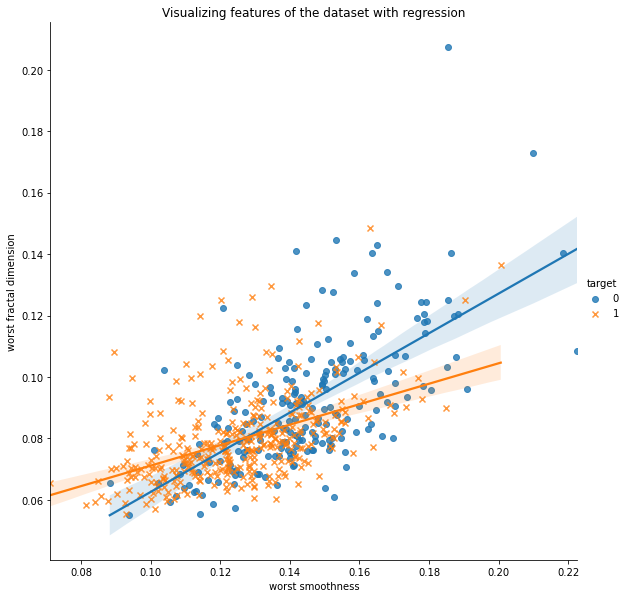

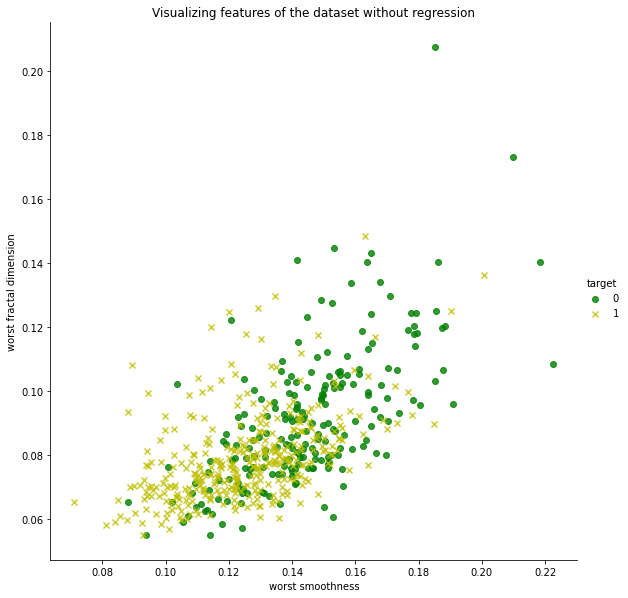

In [13]:
#worst smoothness versus worst fractal dimension
sns.lmplot(x = 'worst smoothness', y = 'worst fractal dimension', data =df , hue  = 'target', markers=["o", "x"], scatter_kws={'alpha':0.8},  height=8, aspect= 1)
plt.title("Visualizing features of the dataset with regression")
sns.lmplot(x = 'worst smoothness', y = 'worst fractal dimension', data =df , hue  = 'target', fit_reg = False , palette=['g','y'], markers=["o", "x"], scatter_kws={'alpha':0.8},  height=8, aspect= 1)
plt.title("Visualizing features of the dataset without regression")

Text(0.5, 1.0, 'Visualizing features of the dataset without regression')

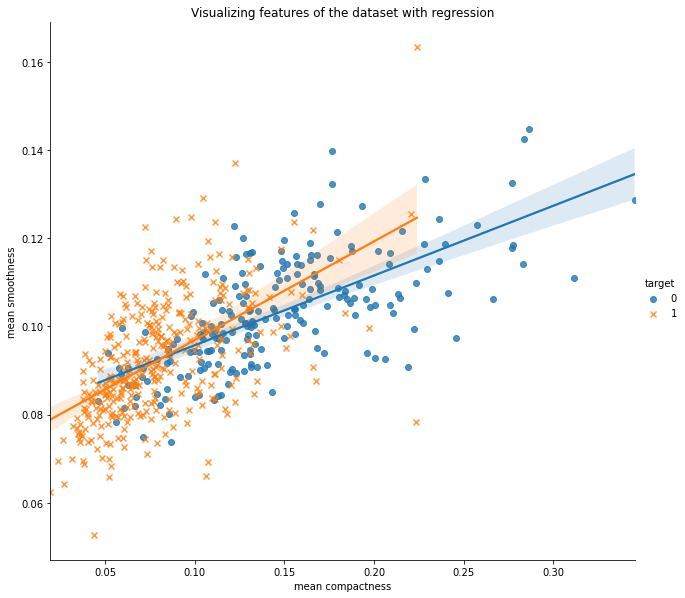

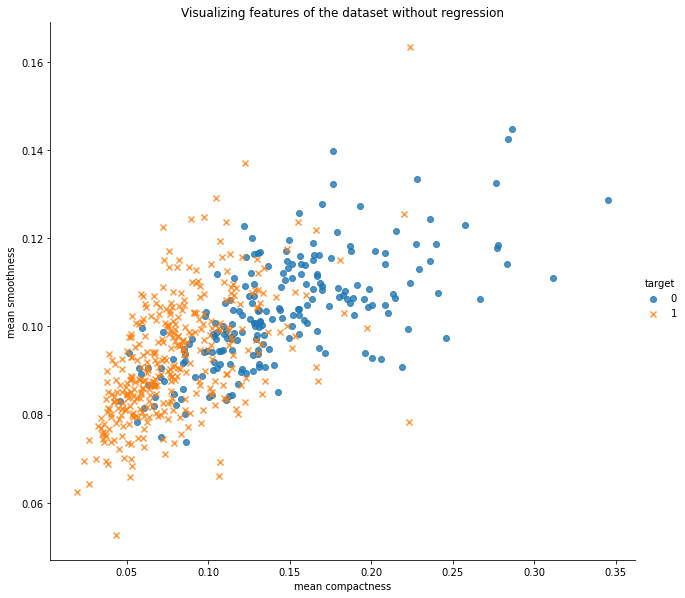

In [14]:
#mean compactness versus mean smoothness
sns.lmplot(x = 'mean compactness', y = 'mean smoothness', data =df , hue  = 'target', markers=["o", "x"], scatter_kws={'alpha':0.8},  height=8, aspect= 1.1)
plt.title("Visualizing features of the dataset with regression")
sns.lmplot(x = 'mean compactness', y = 'mean smoothness', data =df , hue  = 'target', fit_reg= False , markers=["o", "x"], scatter_kws={'alpha':0.8},  height=8, aspect= 1.1)
plt.title("Visualizing features of the dataset without regression")


Text(0.5, 1.0, 'Visualizing differently scaled dataset before standardization')

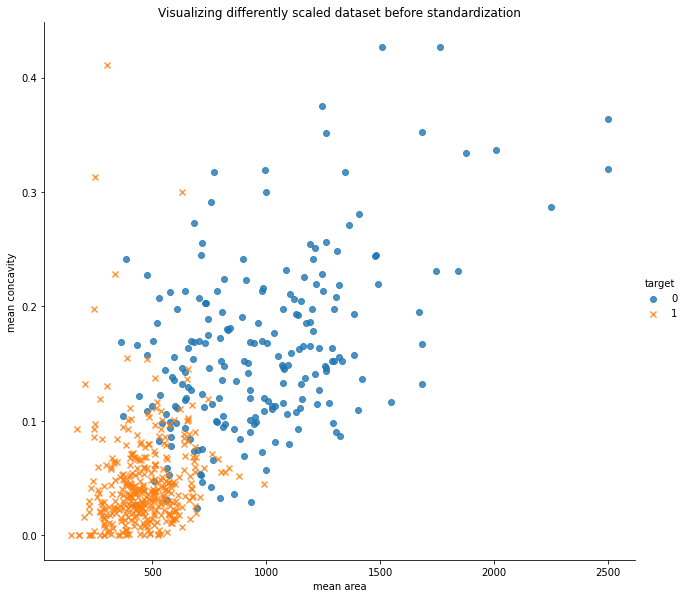

In [15]:
#plotting features with difference in scale
#mean area versus mean concavity 
sns.lmplot(x = 'mean area', y = 'mean concavity', data =df , hue  = 'target', fit_reg= False , markers=["o", "x"], scatter_kws={'alpha':0.8},  height=8, aspect= 1.1)
plt.title("Visualizing differently scaled dataset before standardization")


Text(0.5, 1.0, 'Visualizing differently scaled dataset after standardization')

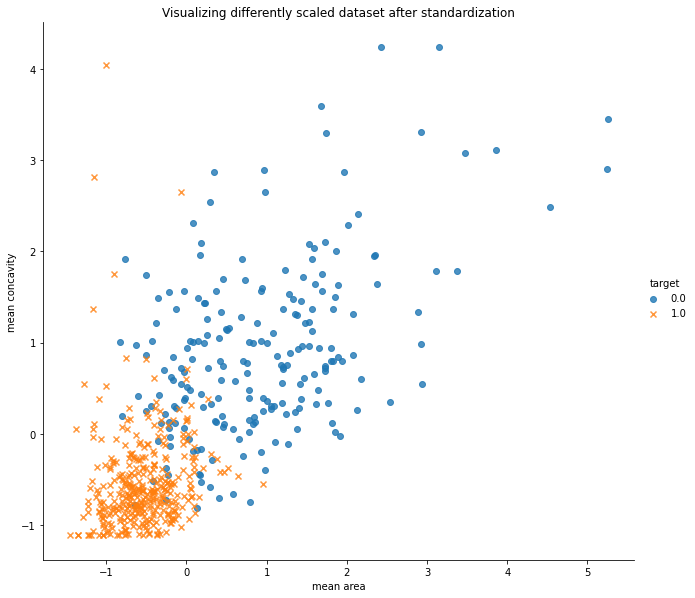

In [16]:
#plotting features with difference in scale after standardization
#mean area versus mean concavity 
from sklearn.preprocessing import StandardScaler
plotvalues = df[['mean area', 'mean concavity', 'target']].values
sc = StandardScaler()
plotvalues[:, :-1] = sc.fit_transform(plotvalues[:, :-1])
plotvalues_Df= pd.DataFrame(plotvalues, columns = ['mean area', 'mean concavity', 'target'])
sns.lmplot(x ='mean area', y = 'mean concavity', data = plotvalues_Df, hue  = 'target', fit_reg= False , markers=["o", "x"], scatter_kws={'alpha':0.8},  height=8, aspect= 1.1)
plt.title("Visualizing differently scaled dataset after standardization")

Text(0.5, 1.0, 'mean concavity after standardization')

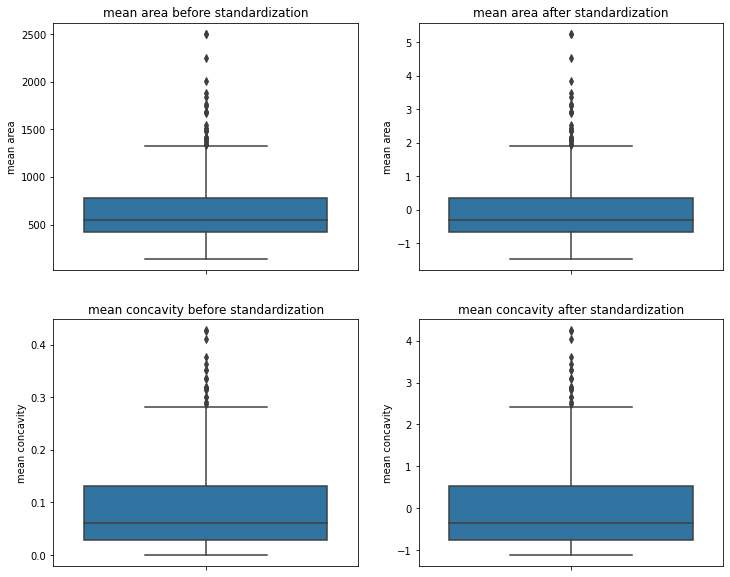

In [17]:
#boxplots to show distribution
#mean area versus mean concavity 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(y = df['mean area']).set_title("mean area before standardization")
plt.subplot(2,2,2)
sns.boxplot(y = plotvalues_Df['mean area']).set_title("mean area after standardization")
plt.subplot(2,2,3)
sns.boxplot(y = df['mean concavity']).set_title("mean concavity before standardization")
plt.subplot(2,2,4)
sns.boxplot(y = plotvalues_Df['mean concavity']).set_title("mean concavity after standardization")


In [18]:
non_standardized = np.array([df['mean area'], df['mean concavity']]).T
standardized = np.array([plotvalues_Df['mean area'], plotvalues_Df['mean concavity']]).T

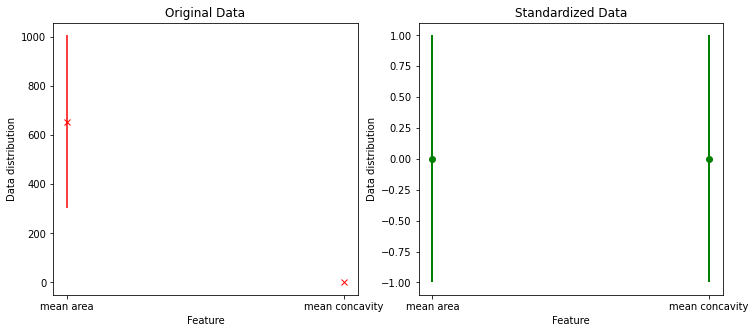

In [19]:
#errorbar to show mean and standard deviation
#mean area versus mean concavity 
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.errorbar([0, 1], non_standardized.mean(axis=0), non_standardized.std(axis=0), linestyle='None', marker='x', color = 'red')
plt.title("Original Data")
plt.xlabel('Feature')
plt.ylabel('Data distribution')
plt.xticks([0,1],['mean area', 'mean concavity'])

plt.subplot(1,2,2)
plt.errorbar([0, 1], standardized.mean(axis=0), standardized.std(axis=0), linestyle='None', linewidth=2, marker='o', color= 'green')
plt.title("Standardized Data")
plt.xlabel('Feature')
plt.ylabel('Data distribution')
plt.xticks([0,1],['mean area', 'mean concavity'])
plt.show()

**Advantages of standardization**

*   In the plot where the features of the dataset are not standardized, the range of x and y axis are different 
*   After standardization, the range of x and y axis becomes similar, but the scatterplot still looks the same. This implies that the standardization technique does not alter the corelation between the two features in study, rather, just resets the values of the features within the same range, having the same mean and standard deviation.
*   Taking a look at the box plots of the two features before and after standardization, we can see that the distribution of the datapoints of the feature has not altered as well.
*   But, taking a look at the error plot, we can see that the mean and standard deviation of 'mean area' was way higher compared to 'mean concavity' before standardization, but after standardization, both the features have a mean of 1, and standard deviation as 0.
*   When the values are within the same range, it is easier to understand and work with the data, and the contribution of the features remains proportionately in calculations such as Euclidean distance. Having the same mean and standard deviation ensure's equal contribution of the features while doing KNN classification
*  Without standardization, the contribution of mean area would be more significant than that of mean concavity when calculating Euclidean distance, which could introduce bias in our results. 








### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [20]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




In [22]:
#question1
from sklearn import neighbors
from sklearn.model_selection import cross_validate

def KNN_Scores(xtrain_set, ytrain_set, iterations = 100, no_of_folds = 5):
  trainacc = []
  crossval_acc = []
  for i in range(1,iterations+1):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = cross_validate(knn, xtrain_set, ytrain_set, cv=no_of_folds,return_train_score=True)
    crossval_acc.append(scores['test_score'].mean()*100)
    trainacc.append(scores['train_score'].mean()*100)
  return crossval_acc, trainacc





In [23]:
#question1
crossval_acc ,trainacc = KNN_Scores(X_train, y_train)

Text(0, 0.5, 'Mean cross validation accuracy')

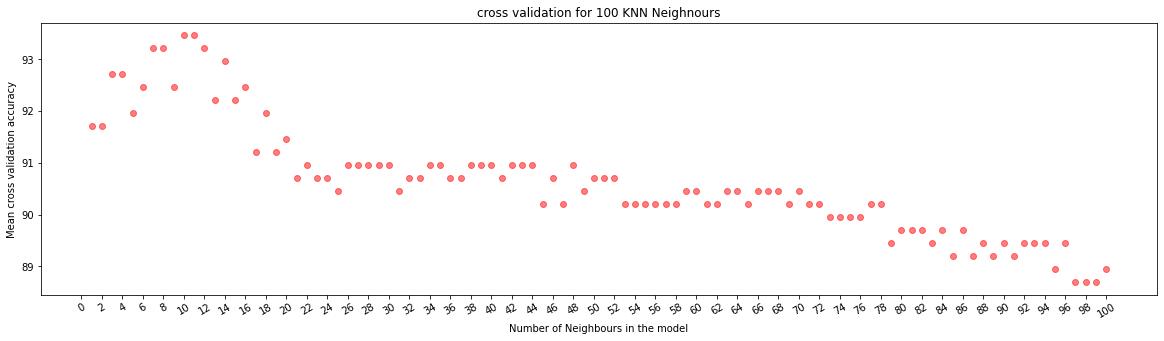

In [24]:
#question1
#plotting cross-validation accuracy versus number of KNN Neighbours
plt.figure(figsize=(20,5))
plt.scatter( np.arange(1,len(crossval_acc)+1), crossval_acc, alpha= 0.5, color = 'red')
plt.title("cross validation for 100 KNN Neighnours")
plt.xticks(np.arange(0,(len(crossval_acc)+2),2), rotation = 30)
plt.xlabel("Number of Neighbours in the model")
plt.ylabel("Mean cross validation accuracy")

In [25]:
#question2 
#best k value and cross validation accuracy
max_crossval = max(crossval_acc)
K_for_max = crossval_acc.index(max_crossval) + 1
print("Best k-value is" ,K_for_max )
print("Best cross validation accuracy is",max_crossval, "%" )

Best k-value is 10
Best cross validation accuracy is 93.46518987341771 %


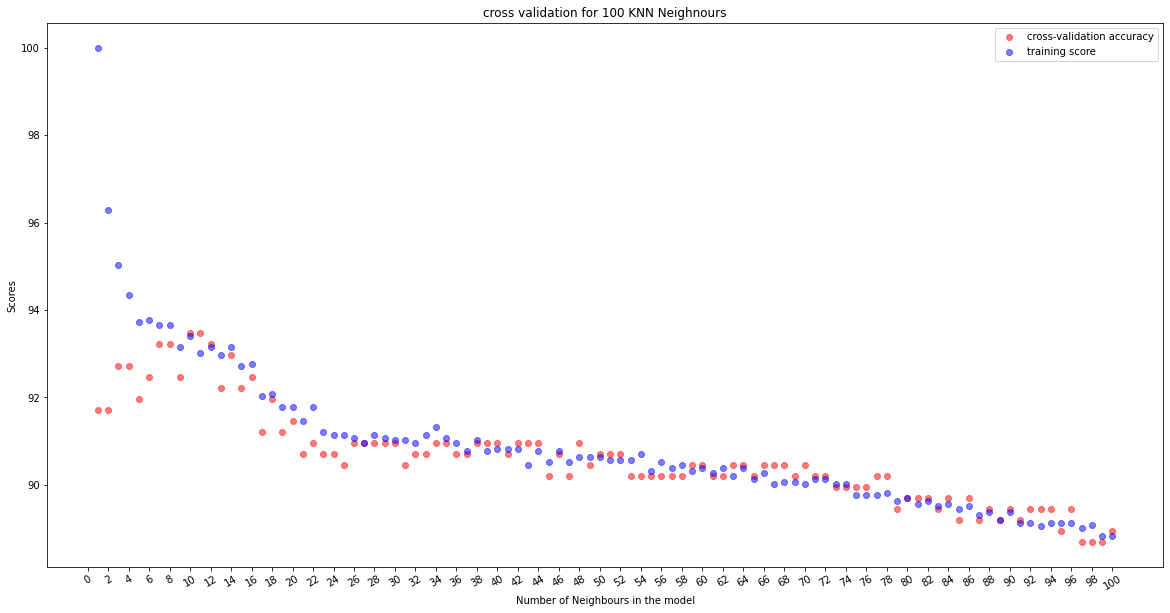

In [26]:
#question3 
plt.figure(figsize=(20,10))
plt.scatter( np.arange(1, len(crossval_acc)+1), crossval_acc, alpha= 0.5, color = 'red', label = 'cross-validation accuracy')
plt.scatter( np.arange(1, len(trainacc)+1), trainacc, alpha= 0.5, color = 'blue', label = 'training score')
plt.title("cross validation for 100 KNN Neighnours")
plt.xticks(np.arange(0,len(crossval_acc)+2,2), rotation = 30)
plt.xlabel("Number of Neighbours in the model")
plt.ylabel("Scores")
plt.legend()



1.   The k-values ranging from 1 - 7 (approximately) are overfitting. This is because we can see that the training score is high, but the cross-validation frequency drops drastically. For example, when K= 1, training score is 1, but the cross-validation score is approximately 0.92. This means the KNN model was too complex and specific to the trainig data set
2.   The k values above 80 (approximately) are underfitting. This is because both the training scores and the cross validation accuracies are low (below 0.9)



## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection.

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

Please note that you don't need to train a separate decision tree model for each iteration (each time you remove a feature). You should train a decision tree model only once in the begining of your function and then use the extracted feature importance as a reference to remove one (useless) feature at a time while you are monitoring the accuracy. 

Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the train set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
 
6. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

7. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[1]**


  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [27]:
from sklearn import tree
def Feature_selector (X_train , y_train , tr=0.95):
  #fitting decision tree model
  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_train,y_train)
  importance = dt.feature_importances_

  #Declaring and assigning local variables
  main_crossval = [] #list of highest cross-validation accuracy after each feature is removed
  bestk = [] #list of best k value for the highest cross-validation accuracy after each feature is removed
  col_names = list(df.columns)
  removed_columns = []

  #calculating threshold with the maximum cross validation accuracy with all the features
  All_feat_cross_val, All_feat_trainacc = KNN_Scores(X_train, y_train) 
  main_crossval.append(max(All_feat_cross_val))
  bestk.append(All_feat_trainacc.index(max(All_feat_trainacc))+1)
  removed_columns.append('No column removed')
  #feat_removed.append(["none", max(All_feat_cross_val), (All_feat_cross_val.index(max(All_feat_cross_val))+1)])
  tr1 = 0.95*max(All_feat_cross_val) 

  #removing features and appending the lists
  while len(X_train.T) != 1:
    r = list(importance).index(min(list(importance)))
    importance = np.delete(importance, r)
    X_train = np.delete(X_train , (r) , 1)
    new_cross_val = []
    new_cross_val, new_trainacc = KNN_Scores(X_train, y_train)
    if((max(new_cross_val)>tr1)):
      main_crossval.append(max(new_cross_val))
      bestk.append(new_cross_val.index(max(new_cross_val))+1)
      removed_columns.append(col_names[r])
      col_names.pop(r)
    if((max(new_cross_val)<tr1)):
      break

  #returning the required list    
  return removed_columns, main_crossval, bestk

In [28]:
removed_columns, main_crossval, bestk = Feature_selector(X_train , y_train , tr=0.95) 


In [29]:
print("List of removed columns and their corresponding best CV Accuracies and k values")
df_withoutstand = pd.DataFrame()
df_withoutstand['removed_columns'] = removed_columns
df_withoutstand['main_crossval'] = main_crossval
df_withoutstand['bestk'] = bestk
df_withoutstand

List of removed columns and their corresponding best CV Accuracies and k values


,removed_columns,main_crossval,bestk
0,No column removed,93.465190,1
1,mean radius,93.465190,10
2,mean texture,93.465190,10
3,mean perimeter,93.215190,7
4,mean area,91.458861,34
5,mean smoothness,91.458861,34
6,mean compactness,91.458861,34
7,mean concave points,91.458861,34
8,mean fractal dimension,91.458861,34
9,radius error,91.458861,34


Text(0, 0.5, 'Mean cross validation accuracy')

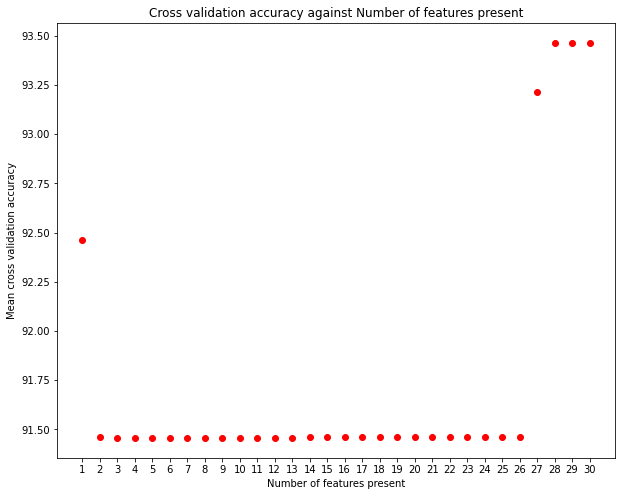

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(np.arange(len(removed_columns), 0, -1), np.array(main_crossval), color = 'red')
plt.title("Cross validation accuracy against Number of features present")
#plt.yticks(np.arange(0.91, 0.94, 0.002))
plt.xticks(np.arange(30, 0, -1))
plt.xlabel("Number of features present")
plt.ylabel("Mean cross validation accuracy")

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have standardized and original training data vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


In [31]:
#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
#calling feature selector 
removed_columns_stand, main_crossval_stand, bestk_stand = Feature_selector(X_train , y_train) 

In [33]:
print(removed_columns_stand, main_crossval_stand, bestk_stand)

['No column removed', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst compactness', 'worst fractal dimension', 'worst smoothness', 'fractal dimension error', 'worst concavity', 'smoothness error', 'mean symmetry', 'mean concavity', 'worst texture', 'worst symmetry', 'area error', 'worst area'] [96.74367088607593, 96.49683544303798, 96.23417721518986, 95.98417721518986, 95.98417721518987, 95.72468354430382, 96.23417721518986, 95.98101265822784, 95.98417721518986, 95.73417721518987, 95.98101265822784, 95.99050632911393, 96.23101265822784, 95.98101265822784, 96.48417721518987, 96.74050632911391, 96.23101265822784, 95.47151898734178, 95.2246835443038, 95.98101265822784, 95.73101265822783, 95.7373417721519, 95.4905063

Text(0, 0.5, 'Mean cross validation accuracy')

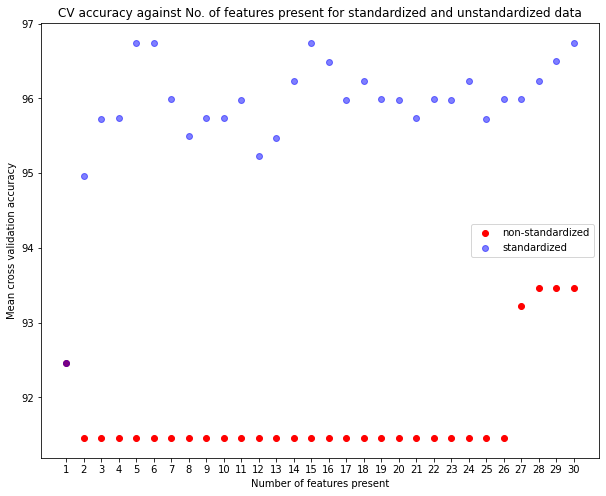

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(np.arange(len(removed_columns), 0, -1), np.array(main_crossval), color = 'red', label = 'non-standardized')
plt.scatter(np.arange(len(removed_columns_stand), 0, -1), np.array(main_crossval_stand), alpha = 0.5 , color = 'blue', label = 'standardized')
plt.title("CV accuracy against No. of features present for standardized and unstandardized data")
plt.xticks(np.arange(len(removed_columns_stand), 0, -1))
#plt.yticks(np.arange(0.91, 1 , 0.005))
plt.legend()
plt.xlabel("Number of features present")
plt.ylabel("Mean cross validation accuracy")

In [35]:
#creating a dataframe with the cross validation frequencies, the most immediate feature that was removed to achieve the cross validation accuracy, the best k values and at what iteration the feature was removed.
df_stand = pd.DataFrame()
df_stand['main_crossval_stand'] = main_crossval_stand
df_stand['removed_columns_stand'] = removed_columns_stand
df_stand['bestk_stand'] = bestk_stand
df_stand['iteration_feat_removal'] = np.arange(0,30,1)
df_stand_sorted = df_stand.sort_values(by = 'main_crossval_stand', ascending = False).reset_index(drop=True)
df_stand_sorted

,main_crossval_stand,removed_columns_stand,bestk_stand,iteration_feat_removal
0,96.743671,No column removed,1,0
1,96.743671,mean symmetry,4,24
2,96.740506,symmetry error,6,15
3,96.737342,mean concavity,6,25
4,96.496835,mean radius,8,1
5,96.484177,concave points error,4,14
6,96.234177,mean compactness,7,6
7,96.234177,mean texture,4,2
8,96.231013,worst radius,3,16
9,96.231013,compactness error,4,12


In [36]:
print("the highest cross validation accuracy is" , df_stand_sorted.iloc[1,0])
print("the number of features removed is", df_stand_sorted.iloc[1,3])
print("features that were removed to achieve the cross validation accuracy", removed_columns_stand[1:df_stand_sorted.iloc[1,3]+1])

the highest cross validation accuracy is 96.74367088607593
the number of features removed is 24
features that were removed to achieve the cross validation accuracy ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst radius', 'worst perimeter', 'worst compactness', 'worst fractal dimension', 'worst smoothness', 'fractal dimension error', 'worst concavity', 'smoothness error', 'mean symmetry']


*  Standardization has definitely helped the model. It can be seen from the graph of cross-validation frequencies against number of features that the accuracies are way higher when the training data set has been standardized.
*  The range of cross-validation accuracies for non-standardized data is from 91 to 94 % , whereas for standardized dataset, accuracies range from 94.5 % to 97 % (approximately)
*   The highest cross-validation accuracies of the non-standardized datasets are 93.4% and is only achieved when the number of features present are from 28-30, whereas after standardization, with significantly lesser features, higher cross-validation accuracies are obtained. 
*   From df_stand_sorted, we can see that after training the model on the standardized dataset with all the features, removing the first 24 columns of removed_columns_stand list and training the model again gives us the maximum accuracy of 96.7436 % with a k-value of 4. 
*   Similarly, it can be seen from the df_stand_sorted, when the first 15 features from the list 'removed_columns_stand' was removed, a cross-validation accuracy of 96.7405 % with a k-value of 6 is obtained.  

Standardization increases the cross-validation accuracies and reduces the number of features used in the model, thereby making the model more efficient.





## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [37]:
#removing the values corresponding to all the features present (its the frst max cross-validation accuracy that will pop up as it is calculated first in the feature_Selector function)
main_crossval_stand = main_crossval_stand[1:]
removed_columns_stand = removed_columns_stand[1:]
bestk_stand = bestk_stand[1:]

In [38]:
#getting the index of the best cross-validation accuracy 
index_bestcrossval = main_crossval_stand.index(max(main_crossval_stand))
index_bestcrossval

23

In [40]:
#gathering the remaining features in one list
Features_remaining = removed_columns_stand[index_bestcrossval+1:] 
Features_remaining = Features_remaining + list(set(dataset['feature_names']).difference(set(removed_columns_stand)))
Features_remaining

['mean concavity',
 'worst texture',
 'worst symmetry',
 'area error',
 'worst area',
 'worst concave points']

In [41]:
#making the new test and train dataset after removing the features
testdata_df = pd.DataFrame(X_test , columns = dataset['feature_names'])
newtestdata_df = testdata_df.loc[:, Features_remaining]
newx_test = np.array(newtestdata_df)

traindata_df = pd.DataFrame(X_train , columns = dataset['feature_names'])
newtraindata_df = traindata_df.loc[:, Features_remaining]
newx_train = np.array(newtraindata_df)

In [42]:
knn_new = neighbors.KNeighborsClassifier(n_neighbors=bestk_stand[index_bestcrossval])
knn_new.fit(newx_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, knn_new.predict(newx_test))
print("The accuracy of the KNN model with the highest cross-validation score on the test set is", accuracy*100, "%")

The accuracy of the KNN model with the highest cross-validation score on the test set is 94.73684210526315 %


In [44]:
cm = confusion_matrix(y_test, knn_new.predict(newx_test)) 
print("               predicted malignant  predicted benign")
print("actual malignant    ", cm[0][0], "\t\t  ", cm[0][1])
print("actual benign       ", cm[1][0], "\t\t\t", cm[1][1] )


               predicted malignant  predicted benign
actual malignant     60 		   3
actual benign        6 			 102


In [45]:
y_pred = knn_new.predict(newx_test)
np.unique(y_pred,return_counts=True )

(array([0, 1]), array([ 66, 105]))



*   We can see that when the best model with the highest cross-validation accuracy was taken, a accuracy of 94.7% was achieved on the test set. 
*   Looking at the confusion matrix, we can see the number of times the model predicted the target features correctly and the number of times the model's prediction was incorrect. 
*   Out of the 66 times, the model predicted True Negative (Malignant/0) 60 times, and False Negative 6 times. Similarly, True Positive was predicted 102 times whereas the prediction was False Positive 3 times. 






References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/